In [7]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = load_breast_cancer()

In [9]:
X = data.data
y = data.target

In [10]:
class LogReg():
    def __init__(self, n_iter=1000, learning_rate=0.01):
        self.n_iter = n_iter
        self.learning_rate = learning_rate

    def fit(self, X, y):
        n = X.shape[1]
        self.weights = np.random.rand(n)
        self.weights[-1] = 0
        for i in range(self.n_iter):
            index = np.random.randint(X.shape[0])
            value = np.ones(n)
            value[:n] = X[index]
            answer = y[index]
            sigma = self.sigmoid(value.dot(self.weights))
            diff = (answer - sigma) * value
            self.weights = self.weights - self.learning_rate * diff

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.weights))

    def sigmoid(self, x):
        return 1/(1+np.exp(-x))

In [11]:
model = LogReg()
n_folds = 10
scores = []
idxs = np.arange(X.shape[0])
np.random.shuffle(idxs)
split_size = idxs.shape[0] // n_folds
for i in range(n_folds):
    test_idxs = idxs[i * split_size : (i + 1) * split_size]
    train_idxs = [i for i in idxs if i not in test_idxs]
    model.fit(X[train_idxs], y[train_idxs])
    predictions = model.predict(X[test_idxs])
    scores.append(np.mean(predictions == y[test_idxs]))
    print(np.mean(scores))

0.6964285714285714
0.6696428571428572
0.636904761904762
0.65625
0.6571428571428571
0.6369047619047619
0.6275510204081632
0.6294642857142857
0.6190476190476191
0.6267857142857143


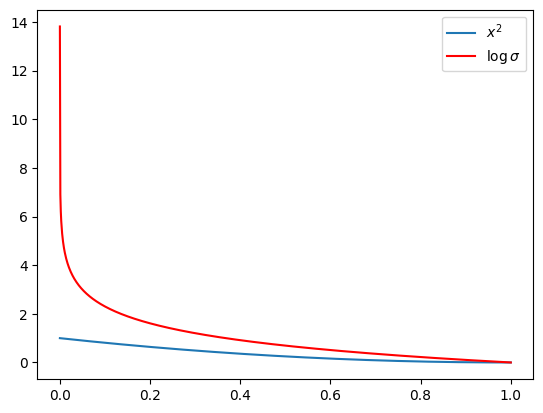

In [17]:
plt.plot(np.linspace(1e-6, 1, 1000), (1 - np.linspace(1e-6, 1, 1000))**2, label='$x^2$');
plt.plot(np.linspace(1e-6, 1, 1000), -np.log(np.linspace(1e-6, 1, 1000)), label='$\log{\sigma}$', c='r');
plt.legend();